In [4]:
!pip install numpy pandas matplotlib unidecode tensorflow transformers

In [3]:
from transformers import pipeline

# Load the NER pipeline with the Portuguese model
ner = pipeline(
    "ner",
    model="lfcc/bert-portuguese-ner",
    aggregation_strategy="first"    # merges tokens into full entities
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'entity_group': 'Pessoa',
  'score': np.float32(0.5943855),
  'word': 'Madonna',
  'start': 19,
  'end': 26},
 {'entity_group': 'Pessoa',
  'score': np.float32(0.7051334),
  'word': 'Gabriel',
  'start': 57,
  'end': 64},
 {'entity_group': 'Local',
  'score': np.float32(0.7548528),
  'word': 'Rio de Janeiro',
  'start': 178,
  'end': 192}]

In [5]:
!pip install lyricsgenius


In [7]:
import requests

# Teste da API ovh
artist = "Caetano Veloso"
title = "Sozinho"
response = requests.get(f"https://api.lyrics.ovh/v1/{artist}/{title}")
print(response.json())


{'lyrics': 'Às vezes, no silêncio da noite\r\nEu fico imaginando nós dois\r\nEu fico ali sonhando acordado, juntando\r\no antes, o agora e o depois\r\npor que você me deixa tão solto?\r\npor que você não cola em mim?\n\nTô me sentindo muito sozinho!\n\n\n\nNão sou nem quero ser o seu dono\n\nÉ que um carinho às vezes cai bem\n\nEu tenho meus segredos e planos secretos\n\nsó abro pra você mais ninguém\n\npor que você me esquece e some?\n\ne se eu me interessar por alguém?\n\ne se ela, de repente, me ganha?\n\n\n\nQuando a gente gostaé claro que a gente cuida\n\nfala que me ama\n\nsó que é da boca pra fora\n\nou você me engana\n\nou não está madura\n\nonde está você agora?\n\n\n\nQuando a gente gostaé claro que a gente cuida\n\nfala que me ama\n\nsó que é da boca pra fora\n\nou você me engana\n\nou não está madura\n\nonde está você agora?\n\n\n\nA veces en el silencio de la noche\n\nme quedo imaginando a nosotros dos\n\nme quedo ahí, soñando despierto, juntando\n\nel antes, el ahora y el

In [10]:
import requests
import time

API_KEY = 'ed3401df282dd1899ce09574d72cba99'
BASE_URL = 'http://ws.audioscrobbler.com/2.0/'

artists = [
    "Caetano Veloso", "Chico Buarque", "Marisa Monte", "Gilberto Gil", "Gal Costa",
    "Djavan", "Milton Nascimento", "Elis Regina", "Maria Bethânia", "Zeca Pagodinho",
    "Lulu Santos", "Legião Urbana", "Engenheiros do Hawaii", "Titãs", "Os Paralamas do Sucesso",
    "Ivete Sangalo", "Seu Jorge", "Martinho da Vila", "Jorge Ben Jor", "Cazuza",
    "Zé Ramalho", "Lenine", "Ana Carolina", "Fagner", "Adriana Calcanhotto",
    "Los Hermanos", "Vanessa da Mata", "Skank", "Pitty", "Roupa Nova",
    "MC Kevinho", "Anitta", "Luan Santana", "Gusttavo Lima", "Zezé Di Camargo & Luciano",
    "Sandy & Junior", "Simone & Simaria", "Maiara & Maraisa", "Henrique & Juliano", "Jorge & Mateus",
    "Marília Mendonça", "Wesley Safadão", "Barões da Pisadinha", "Zeca Baleiro", "Nando Reis",
    "Biquini Cavadão", "O Rappa", "Claudia Leitte", "Chitãozinho & Xororó", "João Bosco & Vinícius",
    "Projota", "Emicida", "Racionais MC's", "Criolo", "Karol Conká",
    "Mano Brown", "Gabriel o Pensador", "Rael", "Mc Poze do Rodo", "Mc Hariel"
]


def get_top_tracks(artist_name):
    params = {
        'method': 'artist.getTopTracks',
        'artist': artist_name,
        'api_key': API_KEY,
        'format': 'json',
        'limit': 10
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        tracks = data.get('toptracks', {}).get('track', [])
        # Ensure tracks is a list
        if isinstance(tracks, dict):
            tracks = [tracks]
        return [track['name'] for track in tracks]
    else:
        print(f"Error fetching tracks for {artist_name}: {response.status_code}")
        return []

# Function to get lyrics from Lyrics.ovh
def get_lyrics(artist, title):
    url = f"https://api.lyrics.ovh/v1/{artist}/{title}"
    response = requests.get(url)
    if response.status_code == 200:
        #print(f"Lyrics found for {artist} - {title}")
        data = response.json()
        lyrics = data.get('lyrics', '')
        # Remove newline characters
        return lyrics.replace('\n', ' ').strip()
    else:
        #print(f"Lyrics not found for {artist} - {title}")
        return ''

# Main script
musicas = []

for artist in artists:
    print(f"Processing artist: {artist}")
    top_tracks = get_top_tracks(artist)
    full_lyrics = ''
    for title in top_tracks:
        lyrics = get_lyrics(artist, title)
        if lyrics:
            full_lyrics += ' ' + lyrics
        time.sleep(0.5)  # To respect API rate limits
    if full_lyrics:
        musicas.append({
            'artista': artist,
            'letra': full_lyrics
        })


Processing artist: Caetano Veloso
Lyrics not found for Caetano Veloso - Sozinho - Ao Vivo
Lyrics found for Caetano Veloso - You Don't Know Me
Lyrics found for Caetano Veloso - Samba de Verão
Lyrics found for Caetano Veloso - Sampa
Lyrics found for Caetano Veloso - Nine Out Of Ten
Lyrics found for Caetano Veloso - Sonhos
Lyrics found for Caetano Veloso - Não Enche
Lyrics found for Caetano Veloso - Samba De Verao
Lyrics found for Caetano Veloso - Queixa
Lyrics not found for Caetano Veloso - Você Não Me Ensinou a Te Esquecer
Processing artist: Chico Buarque
Lyrics not found for Chico Buarque - Cotidiano
Lyrics found for Chico Buarque - Construção
Lyrics found for Chico Buarque - Apesar de você
Lyrics found for Chico Buarque - A Banda
Lyrics found for Chico Buarque - Valsinha
Lyrics found for Chico Buarque - Cálice
Lyrics found for Chico Buarque - João E Maria
Lyrics found for Chico Buarque - O Que Será (A Flor Da Terra)
Lyrics not found for Chico Buarque - Samba e Amor
Lyrics not found fo

In [24]:
dados_artistas = []

dados_artistas = []

for m in musicas:
    letra = m['letra']
    if letra:
        palavras = letra.split()
        all_persons = []
        for i in range(0, len(palavras), 200):
            trecho = ' '.join(palavras[i:i + 200])
            ents = ner(trecho)
            persons = [e['word'] for e in ents if e['entity_group'] == 'Pessoa']
            all_persons.extend(persons)

        dados_artistas.append({
            'artista': m['artista'],
            'entidades': all_persons
        })



#listar todos os artistas e incluir os artistas de uma letra em outra lista
# artist_list = [m["artista"] for m in musicas]

# for m in musicas:
#     letra_norm = m['letra'].lower()
#     artists_in_lyric = [
#         artist
#         for artist in artist_list
#         if artist != m['artista']
#            and artist.lower() in letra_norm
#     ]


dados_artistas[0]

{'artista': 'Caetano Veloso',
 'entidades': ['Laia ladaia sabadana',
  'maria',
  'Laia ladaia sabadana',
  'maria',
  'Laia ladaia sabadana',
  'maria',
  'Laia ladaia sabadana',
  'maria',
  'Lee',
  'Narciso']}

In [25]:
# (sem acentos / lower-case)
from unidecode import unidecode

def normalizar(nome: str) -> str:
    return unidecode(nome).lower().strip()

# Índices únicos de artistas + entidades
nomes = list({normalizar(d['artista']) for d in dados_artistas})
indices = {nome: i for i, nome in enumerate(nomes)}


In [26]:
import numpy as np

# 7) Construção da matriz de adjacência

def construir_matriz_adj(dados, indices):
    N = len(indices)
    M = np.zeros((N, N), dtype=float)
    for item in dados:
        orig = normalizar(item['artista'])
        i_orig = indices[orig]
        for ent in item['entidades']:
            if ent:
                dest = normalizar(ent)
                j = indices.get(dest)
                if j is not None and j != i_orig:
                    M[j, i_orig] = 1
    return M

matriz_adj = construir_matriz_adj(dados_artistas, indices)

In [27]:
# 8) Normalização

def normalizar_colunas(M):
    N = M.shape[0]
    C = np.zeros_like(M)
    for col in range(N):
        s = M[:, col].sum()
        if s == 0:
            C[:, col] = 1.0 / N
        else:
            C[:, col] = M[:, col] / s
    return C

matriz_trans = normalizar_colunas(matriz_adj)

In [28]:
# 9) Cálculo de PageRank

def page_rank(M, damping=0.85, tol=1e-6, max_iter=100):
    N = M.shape[0]
    r = np.ones(N) / N
    for it in range(max_iter):
        r_new = damping * (M @ r) + (1 - damping) / N
        if np.linalg.norm(r_new - r, 1) < tol:
            break
        r = r_new
    return r

ranks = page_rank(matriz_trans)

In [29]:
# 10) Exibir top artistas e plotar

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'nome': nomes,
    'rank': ranks
})
df['rank'] = df['rank'].round(6)
df_sorted = df.sort_values('rank', ascending=False).reset_index(drop=True)

top10 = df_sorted.head(10)
top10


,nome,rank
0,mano brown,0.052529
1,marilia mendonca,0.035992
2,vanessa da mata,0.027724
3,caetano veloso,0.027724
4,djavan,0.019455
5,karol conka,0.019455
6,nando reis,0.019455
7,chico buarque,0.019455
8,skank,0.019455
9,engenheiros do hawaii,0.019455


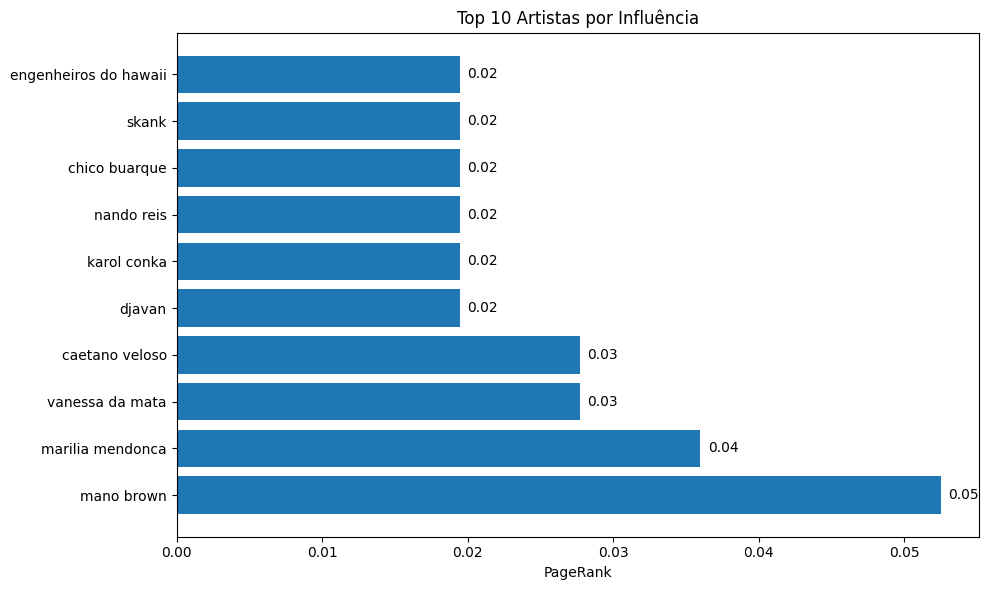

In [30]:
# Plotagem com anotação dos valores
plt.figure(figsize=(10, 6))
bars = plt.barh(top10['nome'][::-1], top10['rank'][::-1])
plt.xlabel('PageRank')
plt.title('Top 10 Artistas por Influência')
plt.gca().invert_yaxis()

# Anotar valor à direita de cada barra
for bar in bars:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(width + 0.0005, y, f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()


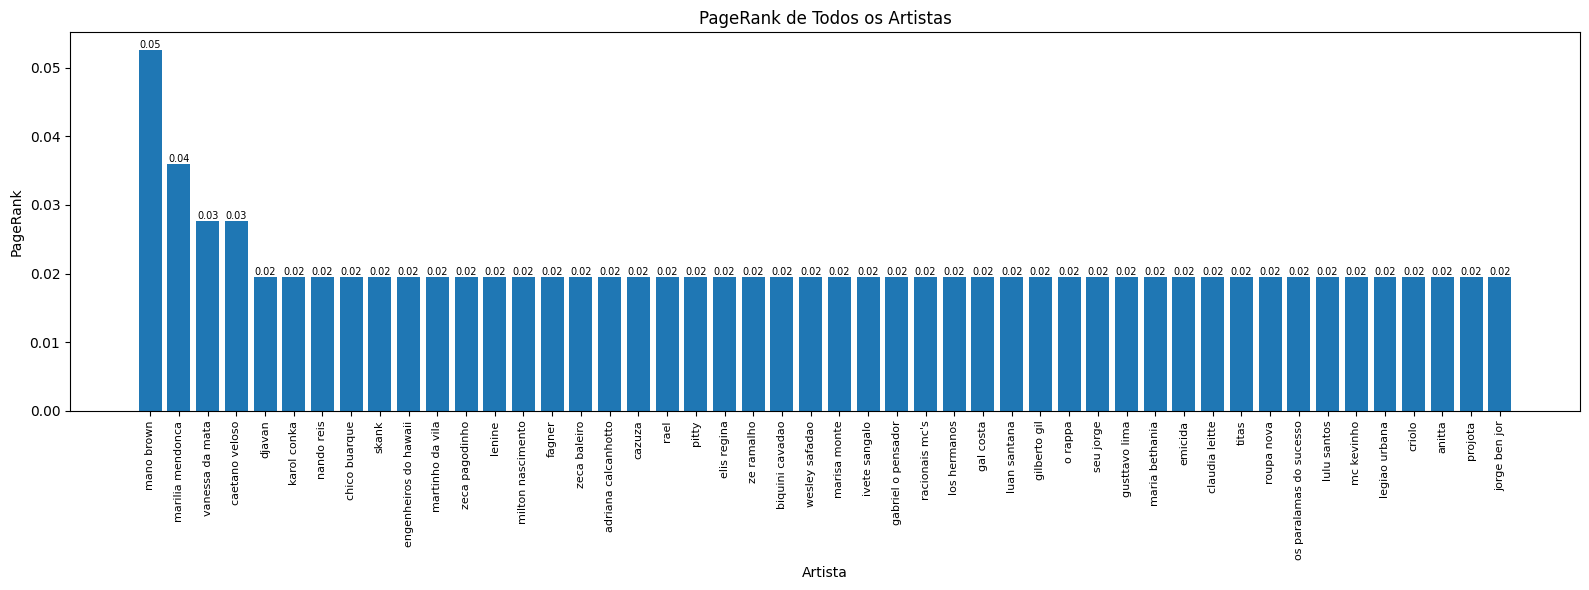

In [36]:
plt.figure(figsize=(16, 6))
bars = plt.bar(df_sorted['nome'], df_sorted['rank'])

plt.xlabel('Artista')
plt.ylabel('PageRank')
plt.title('PageRank de Todos os Artistas')

plt.xticks(rotation=90, fontsize=8)

# Adiciona os valores acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=7
    )

plt.tight_layout()
plt.show()


In [31]:
dados_artistas

[{'artista': 'Caetano Veloso',
  'entidades': ['Laia ladaia sabadana',
   'maria',
   'Laia ladaia sabadana',
   'maria',
   'Laia ladaia sabadana',
   'maria',
   'Laia ladaia sabadana',
   'maria',
   'Lee',
   'Narciso']},
 {'artista': 'Chico Buarque',
  'entidades': ['André Velloso',
   'André Velloso',
   'André Velloso',
   'André Velloso',
   'André Velloso']},
 {'artista': 'Marisa Monte', 'entidades': []},
 {'artista': 'Gilberto Gil',
  'entidades': ['José',
   'João',
   'José',
   'João',
   'João',
   'José',
   'Juliana',
   'Juliana',
   'João',
   'Juliana',
   'Juliana',
   'João',
   'Zé',
   'Zé',
   'Zé',
   'José',
   'José',
   'José',
   'José',
   'Juliana',
   'João',
   'João',
   'José',
   'Juliana',
   'José',
   'José',
   'João',
   'José',
   'José',
   'João',
   'José',
   'João']},
 {'artista': 'Gal Costa', 'entidades': ['Carolina', 'Roberto']},
 {'artista': 'Djavan',
  'entidades': ['Jorge',
   'Maria',
   'Maria',
   'Maria',
   'Leonardo',
   'Caprio